In [1]:
%matplotlib inline
import glob, pandas as pd
pd.options.display.max_rows = 999

In [ ]:
# skip if result.txt exists
y16 = glob.glob('2016'+'/*.txt')
y15 = glob.glob('2015'+'/*.txt')
y14 = glob.glob('2014'+'/*.txt')
y14_16=y14+y15+y16
with open("result.txt", "wb") as outfile:
    for f in y14_16:
        with open(f, "rb") as infile:
            lines=infile.read().split('\n')
            for line in lines:
                if len(line.split('\t'))==8:
                    outfile.write(line+'\n')

In [37]:
df=pd.read_table('result.txt',header=None)
df=df[df[7]==1]
df.shape

(8395622, 8)

In [38]:
df.columns=['doi','year','ref','citation','issn','journal','publisher','author']

In [39]:
df['year']=df['year'].astype(int)

In [40]:
df=df[df['year']<=2017][df['year']>=1950]
#df=df[df[7]==0]

In [41]:
df['count']=1
df['cited']=df['citation'].apply(lambda x: 1 if x>0 else 0)
df['un-cited']=df['citation'].apply(lambda x: 0 if x>0 else 1)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


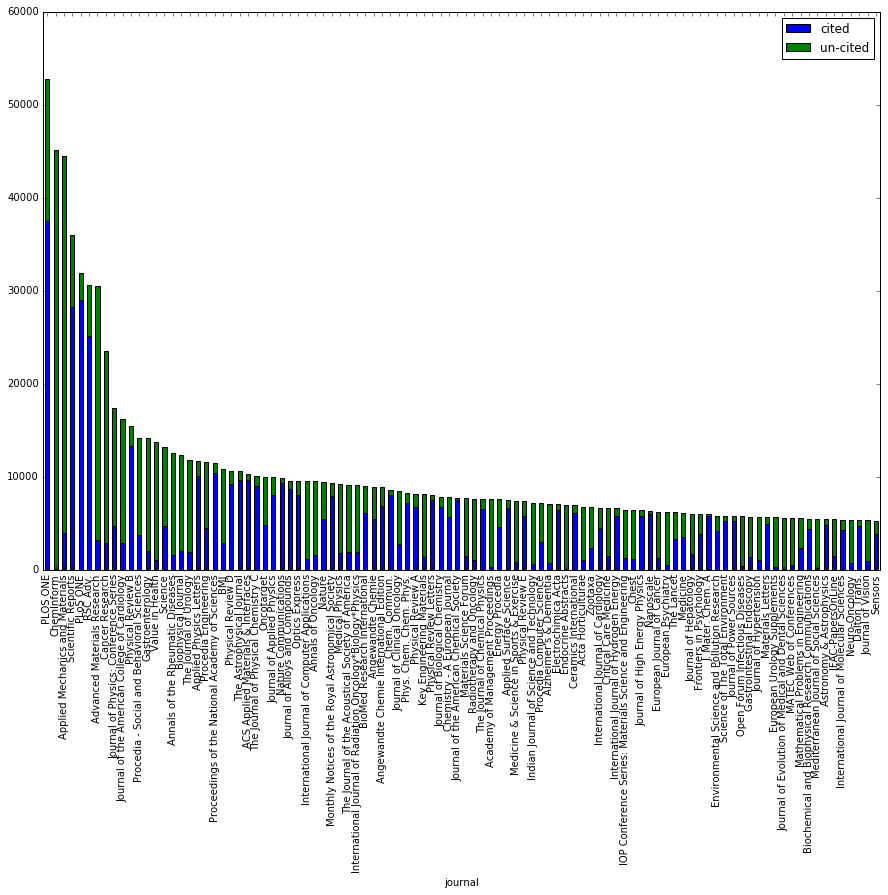

In [42]:
#only journal names
dg=df.groupby(df['journal'])['count','cited','un-cited'].sum()
dg=dg.sort('count',ascending=False)
dg[['cited','un-cited']].head(100).plot(kind='bar',figsize=(15,10),stacked=True)

In [43]:
df=df[~df.issn.isnull()]

In [82]:
dg=df[['count','cited','citation','issn']].groupby(df['issn']).sum()
dg['impact']=dg['citation']/dg['count']
dg=dg.sort_values('count',ascending=False).reset_index()
dg.shape

(42340, 5)

In [63]:
len(dg.issn_l.values)

42340

In [83]:
dg['issn_l']=dg.issn.apply(lambda x:x.split(','))
dg['issn']=dg.issn.apply(lambda x:[x[0]] if len(x)>1 and x[0]==x[1] else x)
issn_pairs=dg[dg.issn.str.len()>1].issn.values
p0=[pair[0] for pair in issn_pairs]
dg['issn_f']=dg.issn.apply(lambda x: issn_pairs[p0.index(x)] if x in p0 else x)
p1=[pair[1] for pair in issn_pairs]
dg['issn_f']=dg.issn.apply(lambda x: issn_pairs[p1.index(x)] if x in p1 else x)
dg.shape

(42340, 7)

In [ ]:
dg

In [72]:
uniqe_issns=[]
for i in dg.issn_t.values:
  if i not in uniqe_issns:
    uniqe_issns.append(i)
len(uniqe_issns)

In [74]:
dg['issn_t']=dg.issn_l.apply(tuple)

In [76]:
dgt=dg[['count','cited','citation','issn_t']].groupby('issn_t').sum()

In [80]:
dgt=dgt.reset_index()

In [81]:
uniqe_issns=[]
for i in dgt.issn_t.values:
  if i not in uniqe_issns:
    uniqe_issns.append(i)
len(uniqe_issns)

42340

In [18]:
high_vol=dg[dg['count']>300]
high_vol.shape

(5669, 4)

In [20]:
high_vol.to_csv('high_volume.csv',index=False)